# UE 4268 - QISKIT Project 2

**`vos noms et prenoms`**, `matricule` et `email` 


Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`

`Date`

## Classification du cancer du sein avec un circuit quantique variationnel

Le but de ce projet est d'aider à mieux comprendre la construction réelle d'un modèle de réseau de neurone quantique, appliqué à des données réelles. Les méthodes de calculs quantiques étant encore imatures, il ne s'agit pas de montrer la supériorité de ces méthodes sur les méthodes de machine learning classiques. L'une des principales motivations pour utiliser l'apprentissage automatique quantique est qu'il est difficile de former de très grands modèles d'apprentissage automatique sur d'énormes base de données. L'espoir est qu'un jour, les fonctionnalités de l'informatique quantique pourront être utilisées comme ressources.

Le cancer du sein est une forme de cancer courante et souvent agressive qui touche des millions de personnes dans le monde. Un diagnostic précoce est essentiel au succès du traitement, et les techniques d'apprentissage automatique ont été largement utilisées pour aider à classer les tumeurs du sein comme bénignes ou malignes.

Ce projet utilise un circuit quantique variationnel pour diagnostiquer, grâce au modèle d'apprentissage automatique quantique (QML, Quantum Machine Learning), le cancer du sein à l'aide de la base de données sur le [cancer du sein du Wisconsin](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset), encore appelée *Wisconsin Diagnostic Breast Cancer* (WDBC).

On rappelle qu'un circuit quantique variationnel, également appelé réseau de neurones quantiques, est constitué d'un circuit quantique fixe appelé *ansatz*, paramétré par un ensemble de variables. Ces variables sont ajustées afin de minimiser une fonction de coût, qui encode le problème à résoudre, comme la **classification** dans notre exemple. Nous optimisons ces paramètres en faisant tourner les qubits du circuit lors de l'apprentissage du modèle.

Le schéma suivant donne un bref aperçu du protocole du classificateur quantique variationnel (VQC, Variational Quantum Classifier) proposé par [Havlicek *et al.*](https://arxiv.org/abs/1804.11326) en 2018.


<center> 
<img src="./Graphics/machinelearningWF.jpg" width=500 />
<img src="./Graphics/VQC_Diagram.png" width=450 />
 </center>

Le classificateur quantique variationnel est un algorithme variationnel où la valeur de la moyenne mesurée est interprétée comme la sortie d'un classificateur. 

Il s'agit de:
1. Explorer une base de données spécifique et le prétraiter ;

2. Créer un réseau de neurones quantiques (classificateur variationnel) en combinant une carte de caractéristiques, un circuit variationnel et un composant de mesure ;

3. Analyser ou commenter les résulats obtenus.  .

Il est vivement conseillé de lire les notions du [Quantum Machine Learning](https://learn.qiskit.org/course/machine-learning/data-encoding) de la bibliothèque Qiskit.


### Importer les modules python basiques

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import time

## Analyse exploratoire des données - Exploratory Data Analysis (EDA)¶

Tout d'abord, explorons le jeu de données WDBC que ce projet va utiliser et voyons ce qu'il contient. Pour notre commodité, cette base de données est disponible dans scikit-learn et peut être chargé facilement.

### Charger la base de données sur le cancer du sein du Wisconsin
Utiliser la fonction `sklearn.datasets.load_breast_cancer`

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Structure de la base de données

Décrire brièvement la structure de la base de données.

In [3]:
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(f"Shape of cancer data: {cancer.data.shape}")

Shape of cancer data: (569, 30)


In [5]:
print(f"Feature names: \n{cancer.feature_names}")

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

La base de données WDBC est composé de 569 points de données, avec 30 caractéristiques chacun, et sur ces 569 points de données, 212 sont étiquetés comme malins et 357 comme bénins.

### Convertir la base de données sklearn en dataframe Pandas

In [7]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

Visualisation des 10 premières lignes de la base de données

In [8]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


### Affecter des variables indépendantes et une variable dépendante (cible)

Les $X$ seront utilisés comme données d'entrée, et les $y$ seront utilisés comme cibles de prédiction pour votre modèle ML.

In [9]:
X = df.drop(['target'], axis=1)
y = df['target']

In [10]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (569, 30)
Shape of y: (569,)


Etant donné que la base de données sur le cancer du sein du Wisconsin présente de nombreuses caractéristiques (plus de 30), ce qui le rend difficile à traiter et à analyser sur un calculateur quantique avec un nombre limité de qubits. Par conséquent, pour rendre la tâche plus gérable, il faut d'abord utiliser l'**analyse en composantes principales (PCA, principal component analysis)** pour réduire la dimensionnalité de l'ensemble de données à seulement quatre variables pour le simulateur.

A cet effet, il faut normaliser les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire, ce qui est nécessaire pour le PCA.

### Normaliser les caractéristiques

Utiliser la classe `sklearn.preprocessing.StandardScaler`.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


### Reduire la dimensionnalité à 4 avec le PCA

La dimension des données correspond au nombre de qubits nécessaires pour coder les données des feature maps quantiques à utiliser.

Utiliser la classe `sklearn.decomposition.PCA`

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X = pca.fit_transform(X)
print (pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


In [13]:
print(pca.singular_values_)

[86.93235745 56.90677266 40.04263937 33.57058877]


### Normaliser les données

Utiliser la classe `sklearn.preprocessing.MinMaxScaler`. Sans spécifier de paramètres, elle fait correspondre les données à $[0,1]$.

In [14]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

## Entraînement d'un modèle classique d'apprentissage automatique

Avant d'entraîner un modèle, nous devons diviser la base de données en deux parties: une base de données d'entraînement et une base de données de test. Nous utiliserons la première partie pour entraîner le modèle et la seconde pour vérifier la performance de nos modèles sur des données non vues.

### Diviser les données

Utiliser 
* la fonction `sklearn.model_selection.train_test_split` qui divise aléatoirement la base de données en ensembles de données de d'entrainement et de test;
* et la classe `qiskit.utils.algorithms_globals` pour générer une graine aléatoire (random seed) afin d'assurer la reproductibilité à travers les exécutions.

In [15]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = (
    train_test_split(X, y, 
                     train_size=0.8, 
                     random_state=algorithm_globals.random_seed)
)

### Support Vector Classifier (SVC) Classique

Entraîner les données avec [Support Vector Classifier](https://scikit-learn.org/stable/modules/svm.html) classique de scikit-learn.

In [16]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value


Vérifier les performances de notre modèle classique et conclure.

In [17]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.97


Ces scores montrent que l'algorithme classique du SVC est très performant.

## Entraînement d'un modèle d'apprentissage automatique quantique

On peut maintenant coder et entraîner un classificateur quantique variationnel (VQC, Variational quantum classifier). Le VQC est le classificateur variationnel quantique le plus simple de la bibliothèque Qiskit Machine Learning (*à installer*, `pip install qiskit[machine-learning] -U`).

Rappelons à nouveau qu'etant donné une base de données contenant les informations du patient, nous voulons prédire, sur la base des données d'entraînement, s'il est susceptible d'avoir un cancer ou non. Il s'agit d'un problème de classification binaire, avec un vecteur d'entrée réel $X$ et une sortie binaire $y\in\{0,1\}$. Nous voulons construire un circuit quantique dont la sortie est un état quantique
$$
|\psi(X:\theta)\rangle = P(y=0|X;\theta)|0\rangle + P(y=1|X;\theta)|1\rangle,
$$
avec $\theta$ les paramètres du circuit quantique et $X$ les valeurs d'entrée.

Deux éléments centraux de la classe VQC sont la carte de caractéristiques ou *feature map* et l'*ansatz*.

* Comme les données sont classiques, elles sont constituées de bits, et non de qubits. Il faut trouver un moyen de coder les données en qubits (c'est-à-dire $X_i\mapsto|\phi(X_i)\rangle$). Ce processus est crucial si l'on veut obtenir un modèle quantique efficace. On parle généralement de *mappage* ou de correspondance, ce qui est le rôle du *feature map*. Il y a différents *feature maps* disponibles (`ZFeatureMap`, `ZZFeatureMap`, `PauliFeatureMap`) dans la bibliothèque de Qiskit. Il est possible également d'en programmer une personnalisée. Nous suggérons d'utiliser `ZZFeatureMap` (*Second-order Pauli-Z evolution circuit*). 

* Une fois les données chargées, on peut appliquer un circuit quantique paramétré, également appelé un *ansatz* ou forme variationnelle. Ce circuit est un analogue direct des couches des réseaux de neurones classiques. Il a un ensemble de paramètres ou de poids réglables. Les poids sont optimisés de telle sorte qu'ils minimisent une fonction objective. Cette fonction objectif caractérise la distance entre les prédictions et les données étiquetées connues. Le circuit est basé sur des opérations unitaires et dépend de paramètres externes qui seront ajustables.  

    Étant donné un état préparé $|\psi_i\rangle$, le circuit modèle $\mathtt{U}(w)$ fait correspondre $|\psi_i\rangle$ à un autre vecteur $|\psi_f(X:\theta)\rangle=\mathtt{U}(w)|\psi_i\rangle$. $\mathtt{U}(w)$ est constitué d'une série de portes unitaires. Nous suggérons d'utiliser ici des portes de $\mathtt{R}_y$ qui vont tourner les qubits autour de l'axe Y. L'intrication entre deux qubits sera assurée par des portes CNOT. 

### Encoder les données comme qubits

Utiliser la fonction `qiskit.circuit.library.ZZFeatureMap` pour créer un circuit quantique à 4 entrées, une entrée pour chaque feature. Imprimer le circuit décomposé en ses portes constitutives pour avoir une idée de l'apparence des feature map.

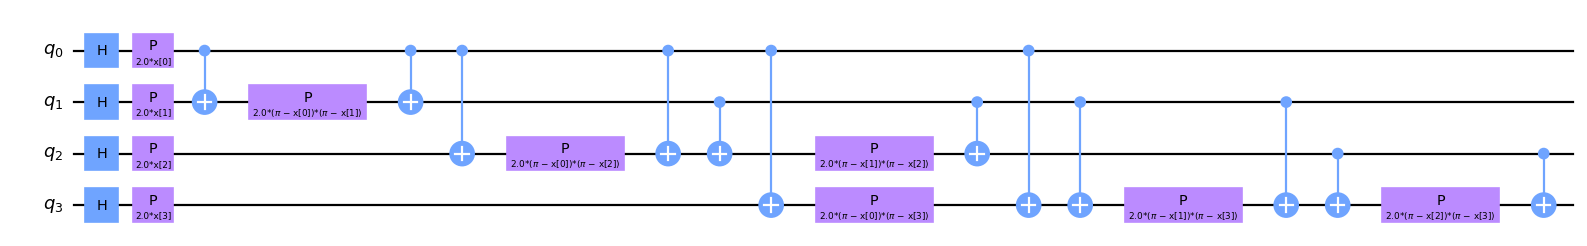

In [18]:
from qiskit.circuit.library import ZZFeatureMap

num_features = train_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output='mpl', fold=30, scale=.8)

On note les paramètres $x[0], \cdots, x[3]$ qui stockent les diverses fonctionnalités.

### Construire le circuit quantique parametré

Utiliser le circuit quantique variationnel `qiskit.circuit.library.RealAmplitutes`. Imprimer le circuit décomposé obtenu.

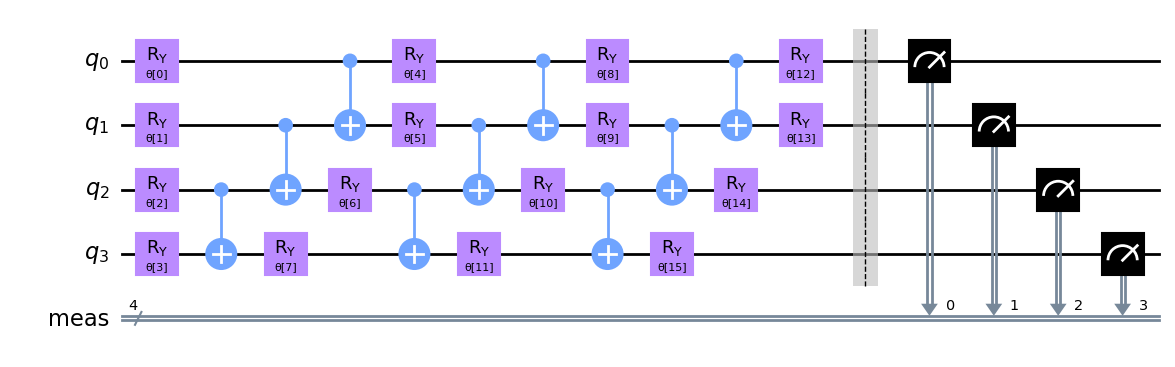

In [19]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.measure_all()
ansatz.decompose().draw(output='mpl', fold=20)

Ce circuit a 16 paramètres nommés $\theta[0], \cdots, \theta[15]$ qui sont les poids entraînables du classificateur.

### Combiner feature map et circuit quantique parametré

Imprimer le circuit obtenu.

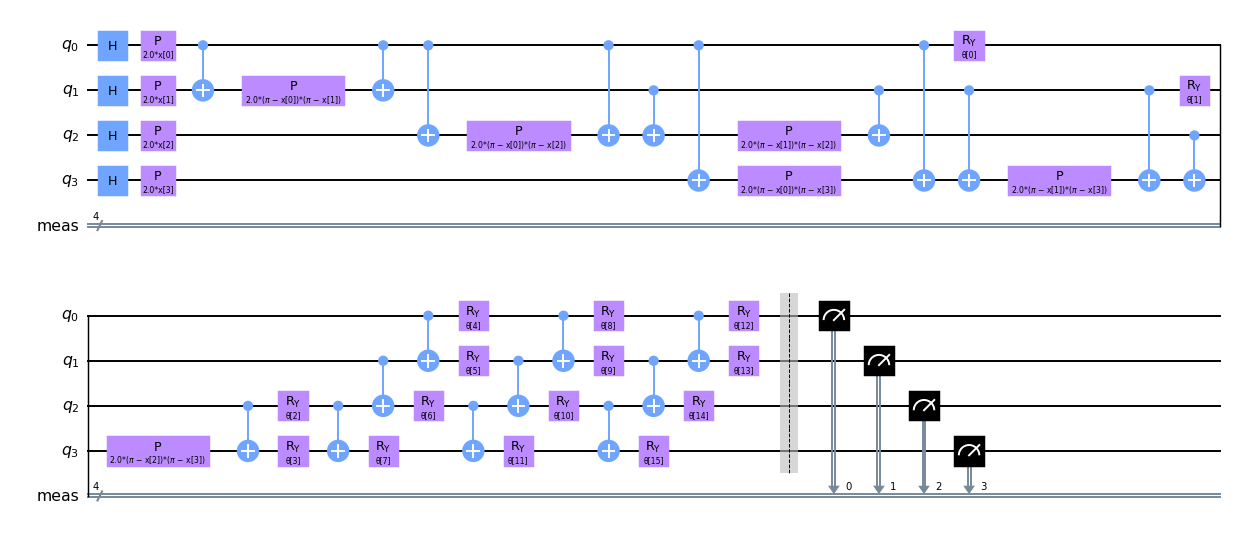

In [20]:
circuit = feature_map.compose(ansatz)
circuit.decompose().draw(output='mpl',scale=.7)

### Choisir l'optimiseur classique

On a besoin d'une routine d'optimisation classique qui modifie les valeurs de notre circuit variationnel et répète à nouveau tout le processus. C'est la boucle classique qui entraîne nos paramètres jusqu'à ce que la valeur de la fonction de coût diminue. Dans la bibliothèque Qiskit, on a les méthodes d'optimisation classiques suivantes:

* `qiskit.algorithms.optimizers.COBYLA` - Optimisation contrainte par approximation linéaire.
* `qiskit.algorithms.optimizers.SPSA` - Optimiseur d'approximation stochastique de perturbation simultanée.
* `qiskit.algorithms.optimizers.SLSQP` - Optimiseur de programmation des moindres carrés séquentiels

Il est à noter que la principale caractéristique de SPSA est l'approximation du gradient stochastique, qui ne nécessite que deux mesures de la fonction objective, quelle que soit la dimension du problème d'optimisation. Selon la documentation Qiskit, le SPSA peut être utilisé en présence de bruit, et il est donc indiqué dans les situations impliquant une incertitude de mesure sur un calcul quantique lors de la recherche d'un minimum. C'est un fait important puisque nous sommes encore dans l'ère des NISQ.

Utiliser la méthode d'optimisation `qiskit.algorithms.optimizers.SPSA`.

In [21]:
from qiskit.algorithms.optimizers import SPSA

### Définir des valeurs aléatoires initiales pour les portes ("pondérations")

Utiliser la fonction `numpy.random.random` pour définir 16 valeurs aléatoires initiales pour les poids entraînables du classificateur.

In [22]:
initial_point = np.random.random(ansatz.num_parameters)
initial_point

array([0.39890261, 0.55271982, 0.40324234, 0.64248676, 0.78931835,
       0.71916915, 0.30305237, 0.92619426, 0.40791378, 0.9110733 ,
       0.05368254, 0.65026295, 0.99085468, 0.039987  , 0.85726921,
       0.90856214])

### Encoder les étiquettes

Dans le VQC, les étiquettes peuvent être transmises sous différents formats. Il peut s'agir d'étiquettes simples, d'un tableau numpy unidimensionnel contenant des étiquettes entières comme 
> [0, 1, 2, ...]

ou d'un tableau numpy contenant des étiquettes catégorielles de type chaîne. Les libellés codés à une dimension sont également supportés. En interne, les étiquettes sont transformées en un codage *one-shot* et le classificateur est toujours entraîné sur des étiquettes *one-shot*. Ce sont par exemple, des données comme celles-ci
> [1, 0, 0], [0, 1, 0], [0, 0, 1]


La classification multi-label n'est pas supportée. Par exemple, des données comme ici
> [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]

Utiliser la classe `sklearn.preprocessing.OneHotEncoder`

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train_labels = train_labels.to_numpy()
test_labels = test_labels.to_numpy()

train_labels_oh = encoder.fit_transform(train_labels.reshape(-1,1)).toarray()
test_labels_oh = encoder.fit_transform(test_labels.reshape(-1,1)).toarray()

### Ajouter une fonction de rappel

Nous allons ajouter une fonction de rappel appelée `callback_graph`. `VQC` appellera cette fonction pour chaque évaluation de la fonction objective avec deux paramètres: les poids actuels et la valeur de la fonction objective à ces poids. Notre rappel ajoutera la valeur de la fonction objective à un tableau afin que nous puissions tracer l'itération par rapport à la valeur de la fonction objective. Le rappel mettra à jour le tracé à chaque itération. Noter que vous pouvez faire ce que vous voulez dans une fonction de rappel, tant qu'elle a la signature à deux paramètres que nous avons mentionnée ci-dessus.

In [24]:
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

### Choisir le simulateur quantique

Nous créons une instance de la primitive `Sampler` qui est l'implémentation de référence basée sur le vecteur d'état (`statevector`). Elle génère des quasi-probabilités à partir de circuits d'entrée.

Utiliser la classe `qiskit.primitives.Sampler` pour créer un échantillonneur soutenu par un calculateur quantique.

In [25]:
from qiskit.primitives import Sampler


### Créer un objet VQC et l'exécuter sur le simulateur quantique

Construire le classificateur et à l'adapter ou *fitter*.

In [26]:
from qiskit_machine_learning.algorithms.classifiers import VQC

In [27]:
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          loss='cross_entropy',
          initial_point=initial_point,
          optimizer=SPSA(),
          callback=callback_graph,
          sampler=Sampler()
          )

Tracer l'évolution temporelle de la fonction de coût et imprimer le temps d'entrainement.

Noter que l'optimisation prendra un certain temps à s'exécuter.

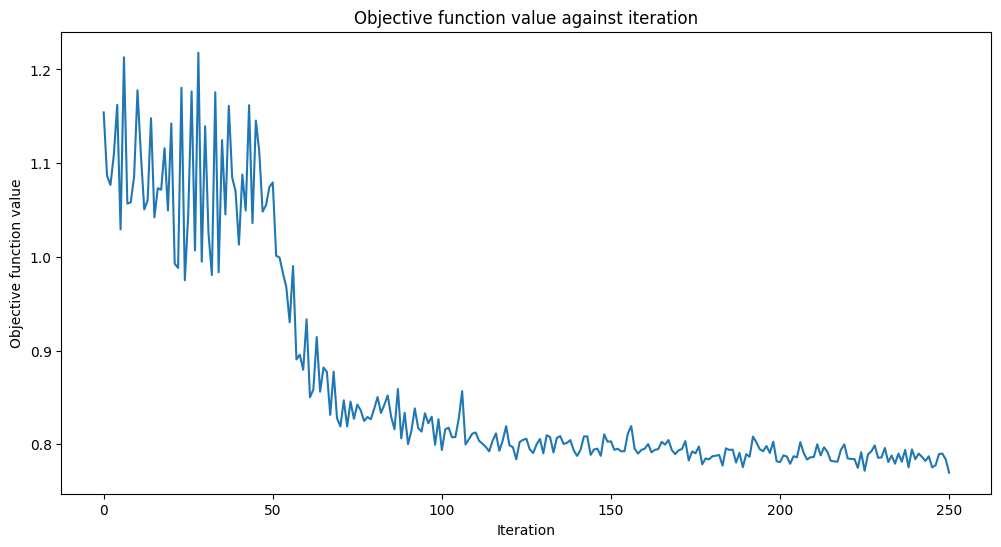

Training time: 625 seconds


In [28]:
# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels_oh)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

### Imprimer les métriques de la base de données

In [29]:
train_score_q4 = vqc.score(train_features, train_labels_oh)
test_score_q4 = vqc.score(test_features, test_labels_oh)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.76
Quantum VQC on the test dataset:     0.76


Comme nous pouvons le constater, les scores sont élevés et le modèle peut être utilisé pour prédire des étiquettes sur des données non vues.

### Choix d'un autre ansatz

Utiliser la classe `qiskit.circuit.library.EfficientSU2` pour construire l'*ansatz* et reprendre la simulation quantique.

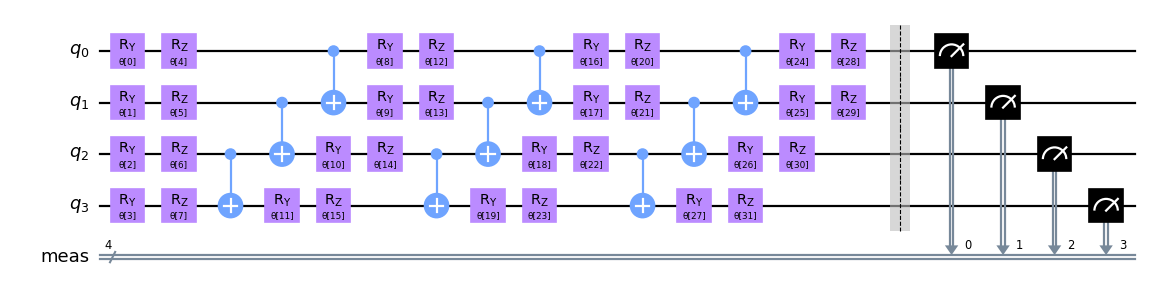

In [30]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)

ansatz.measure_all()
ansatz.decompose().draw(output='mpl', fold=20, scale=.8)

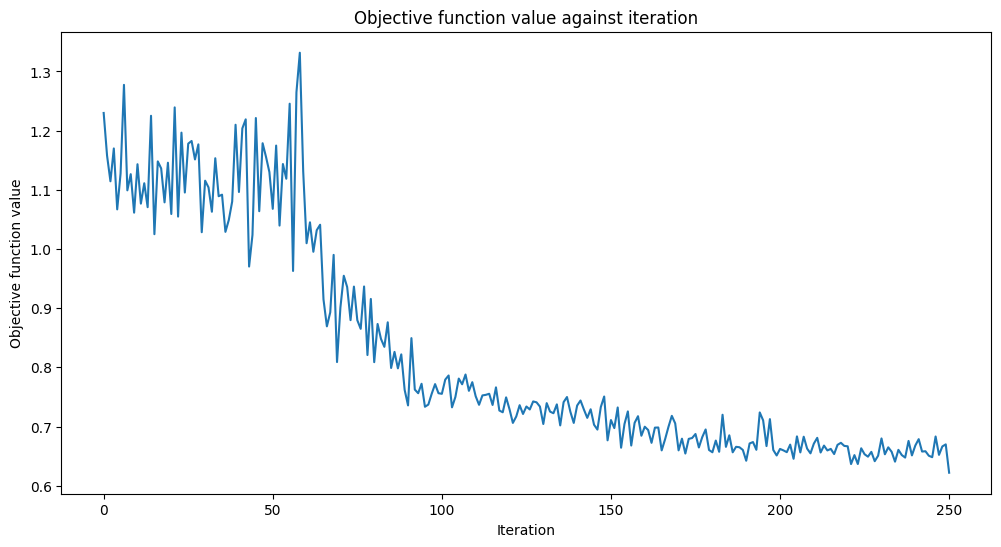

Training time: 888 seconds


In [31]:
vqc = VQC(
    sampler=Sampler(),
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=SPSA(),
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels_oh)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [32]:
train_score_q4_eff = vqc.score(train_features, train_labels_oh)
test_score_q4_eff = vqc.score(test_features, test_labels_oh)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q4_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q4_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.89
Quantum VQC on the test dataset using EfficientSU2:     0.91


### Conclusion¶

Dans ce projet, nous avons construit un modèle d'apprentissage automatique classique et deux quantiques. Imprimons un tableau global avec nos résultats.

In [33]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"VQC, 4 features, EfficientSU2   | {train_score_q4_eff:10.2f} | {test_score_q4_eff:10.2f}")

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.97 |       0.97
VQC, 4 features, RealAmplitudes |       0.76 |       0.76
VQC, 4 features, EfficientSU2   |       0.89 |       0.91


Sans surprise, le modèle classique fonctionne mieux que ses homologues quantiques, mais le ML classique a parcouru un long chemin et le ML quantique n'a pas encore atteint ce niveau de maturité. 

Une autre observation est que même un simple changement d'*ansatz* peut conduire à de meilleurs résultats. Le modèle à deux caractéristiques avec l'*ansatz* `EfficientSU2` fonctionne mieux que celui avec `RealAmplitudes`. Cela signifie que le choix des hyperparamètres joue le même rôle critique en ML quantique qu'en ML classique, et la recherche d'hyperparamètres optimaux peut prendre beaucoup de temps.

In [34]:
import qiskit.tools.jupyter
%qiskit_version_table

In [35]:
# from qiskit.aqua.components.feature_maps import RawFeatureVector